In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ted = pd.read_csv("ted_main.csv")
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [3]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [5]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

Before we go any further, let us convert the Unix timestamps into a human readable format.

In [6]:
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [7]:
ted

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,What we're missing in the debate about immigra...,"Between 2008 and 2016, the United States depor...",Duarte Geraldino,Journalist,1,476,TED2017,1496707200,1505851216,17,"['TED Residency', 'United States', 'community'...",4,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,Armando Azua-Bustos: The most Martian place on...,The most Martian place on Earth,How can you study Mars without a spaceship? He...,Armando Azua-Bustos,Astrobiologist,1,290,TED2017,1492992000,1505919737,6,"['Mars', 'South America', 'TED Fellows', 'astr...",3,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,651,TED2017,1492992000,1506006095,10,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,Theo E.J. Wilson: A black man goes undercover ...,A black man goes undercover in the alt-right,In an unmissable talk about race and politics ...,Theo E.J. Wilson,Public intellectual,1,1100,TEDxMileHigh,1499472000,1506024042,32,"['Internet', 'TEDx', 'United States', 'communi...",1,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",https://www.t

In [10]:
import datetime
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [11]:
ted.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [12]:
len(ted)

2550

We have over 2550 talks at our disposal. These represent all the talks that have ever been posted on the TED Platform until September 21, 2017 and has talks filmed in the period between 1994 and 2017.

For starters, let us perform some easy analysis. I want to know what the 15 most viewed TED talks of all time are. The number of views gives us a good idea of the popularity of the TED Talk.

In [14]:
pop_talks = ted[['name','main_speaker','film_date','views']].sort_values('views',ascending=False)[:15]
pop_talks

,name,main_speaker,film_date,views
0,Ken Robinson: Do schools kill creativity?,Ken Robinson,25-02-2006,47227110
1346,Amy Cuddy: Your body language may shape who yo...,Amy Cuddy,26-06-2012,43155405
677,Simon Sinek: How great leaders inspire action,Simon Sinek,17-09-2009,34309432
837,Brené Brown: The power of vulnerability,Brené Brown,06-06-2010,31168150
452,Mary Roach: 10 things you didn't know about or...,Mary Roach,06-02-2009,22270883
1776,Julian Treasure: How to speak so that people w...,Julian Treasure,10-06-2013,21594632
201,Jill Bolte Taylor: My stroke of insight,Jill Bolte Taylor,27-02-2008,21190883
5,Tony Robbins: Why we do what we do,Tony Robbins,02-02-2006,20685401
2114,James Veitch: This is what happens when you re...,James Veitch,08-12-2015,20475972
1416,Cameron Russell: Looks aren't everything. Beli...,Cameron Russell,27-10-2012,19787465


- Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 47.2 million views.
- Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
- Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.
- There are only 2 talks that have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark.

Let us make a bar chart to visualise these 15 talks in terms of the number of views they garnered.

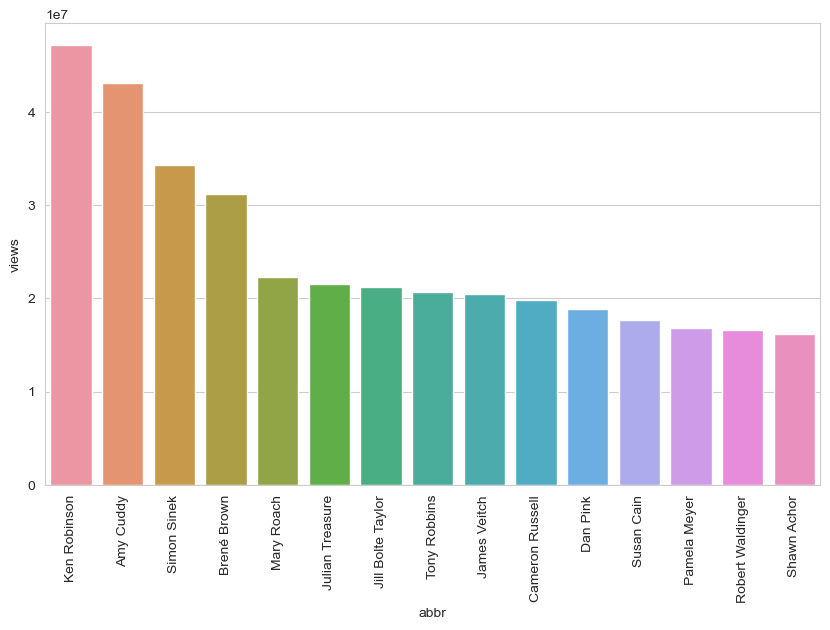

In [21]:
pop_talks['abbr'] = pop_talks['main_speaker']
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)
plt.xticks(rotation=90)
plt.show()

C:\Users\sachu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


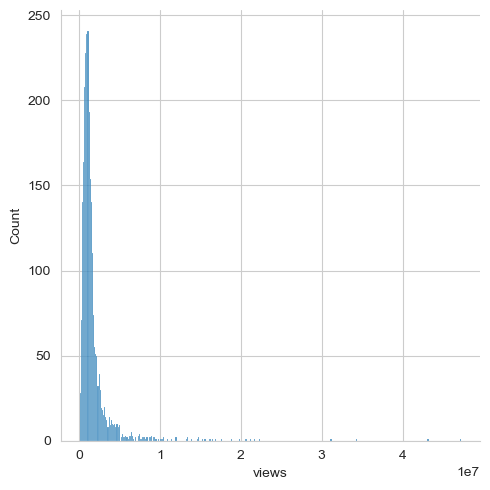

In [22]:
sns.displot(ted['views'])

C:\Users\sachu\AppData\Local\Temp\ipykernel_10680\3603774551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ted[ted['views'] < 4000000]['views'])


<Axes: xlabel='views', ylabel='Density'>

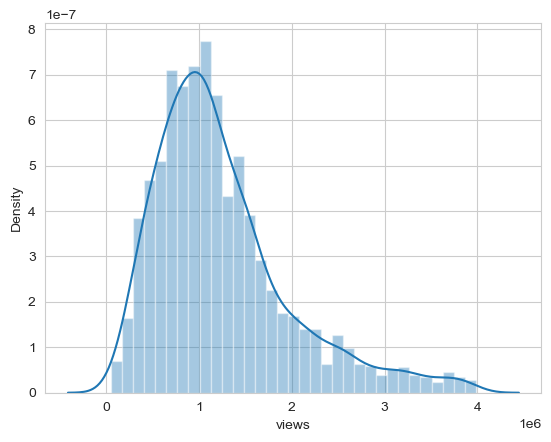

In [25]:
sns.distplot(ted[ted['views'] < 4000000]['views'])

In [26]:
ted['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

The average number of views on TED Talks in 1.6 million. and the median number of views is 1.12 million. This suggests a very high average level of popularity of TED Talks. We also notice that the majority of talks have views less than 4 million.

In [27]:
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

- On average, there are 191.5 comments on every TED Talk.
- There is a huge standard deviation associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers.
- The minimum number of comments on a talk is 2 and the maximum is 6404. The range is 6402.. The minimum number, though, may be as a result of the talk being posted extremely recently.

C:\Users\sachu\AppData\Local\Temp\ipykernel_10680\2541257226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ted['comments'])


<Axes: xlabel='comments', ylabel='Density'>

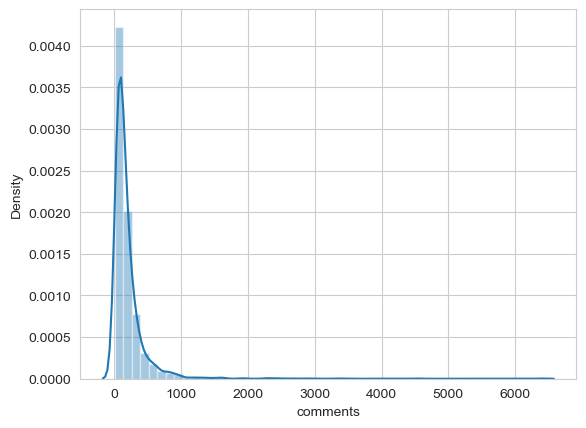

In [28]:
sns.distplot(ted['comments'])

C:\Users\sachu\AppData\Local\Temp\ipykernel_10680\4059360748.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ted[ted['comments'] < 500]['comments'])


<Axes: xlabel='comments', ylabel='Density'>

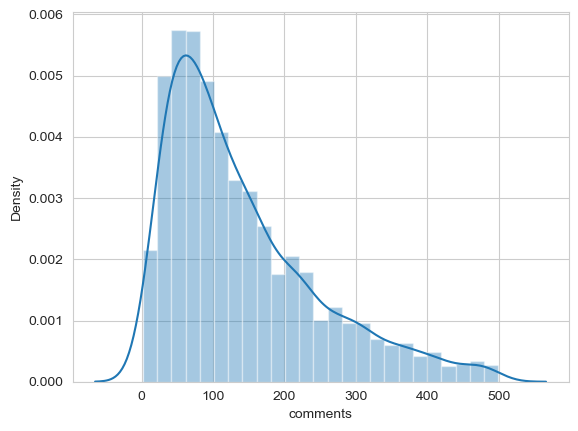

In [30]:
sns.distplot(ted[ted['comments'] < 500]['comments'])

From the plot above, we can see that the bulk of the talks have fewer than 500 comments. This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is only 2550 talks.

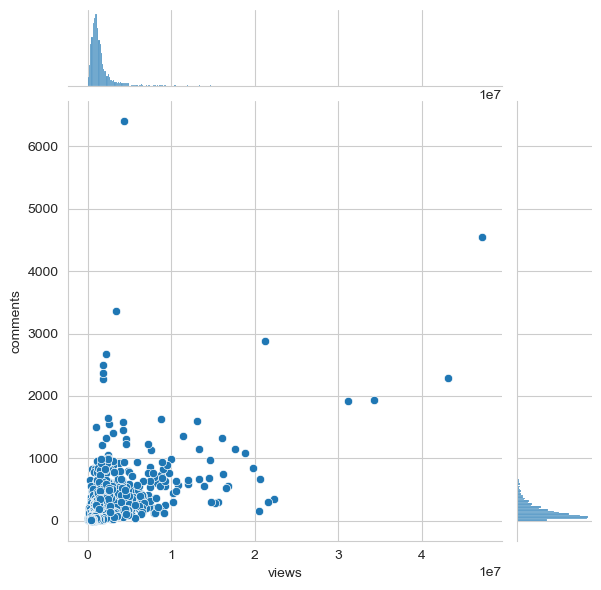

In [31]:
sns.jointplot(x='views', y='comments', data=ted)

In [32]:
ted[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [33]:
ted[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above, Richard Dawkins' talk on Militant Atheism' generated the greatest amount of discussion and opinions despite having significantly lesser views than Ken Robinson's talk, which is second in the list.

Which talks tend to attract the largest amount of discussion?

In [34]:
ted['dis_quo'] = ted['comments']/ted['views']

In [35]:
ted[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


#### Analysing TED Talks by the month and the year

In [38]:
ted['month'] = ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_ted = pd.DataFrame(ted['month'].value_counts()).reset_index()
month_ted.columns = ['month', 'talks']

<Axes: xlabel='month', ylabel='talks'>

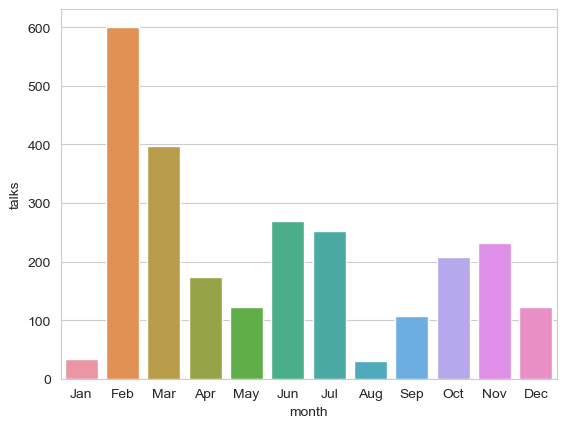

In [39]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

February is clearly the most popular month for TED Conferences whereas August and January are the least popular. February's popularity is largely due to the fact that the official TED Conferences are held in February.

In [40]:
ted_x = ted[ted['event'].str.contains('TEDx')]
x_month_ted = pd.DataFrame(ted_x['month'].value_counts().reset_index())
x_month_ted.columns = ['month', 'talks']

<Axes: xlabel='month', ylabel='talks'>

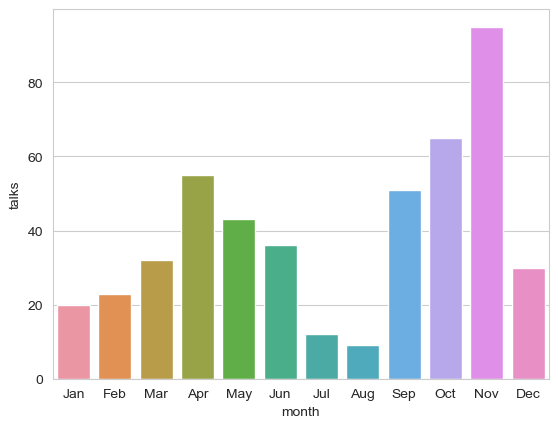

In [41]:
sns.barplot(x='month', y='talks', data=x_month_ted, order=month_order)

As far as TEDx talks are concerned, **November** is the most popular month. However, we cannot take this result at face value as very few of the TEDx talks are actually uploaded to the TED website and therefore, it is entirely possible that the sample in our dataset is not at all representative of all TEDx talks. A slightly more accurate statement would be that **the most popular TEDx talks take place the most in October and November.**

In [42]:
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [43]:
ted['day'] = ted['film_date'].apply(getday)

In [44]:
day_ted = pd.DataFrame(ted['day'].value_counts()).reset_index()
day_ted.columns = ['day', 'talks']

<Axes: xlabel='day', ylabel='talks'>

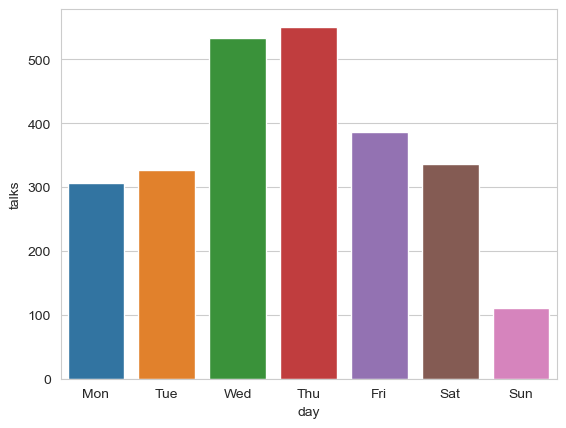

In [45]:
sns.barplot(x='day', y='talks', data=day_ted, order=day_order)

The distribution of days is almost a bell curve with Wednesday and Thursday being the most popular days and Sunday being the least popular.

In [51]:
ted['year'] = ted['film_date'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

<Axes: xlabel='year', ylabel='talks'>

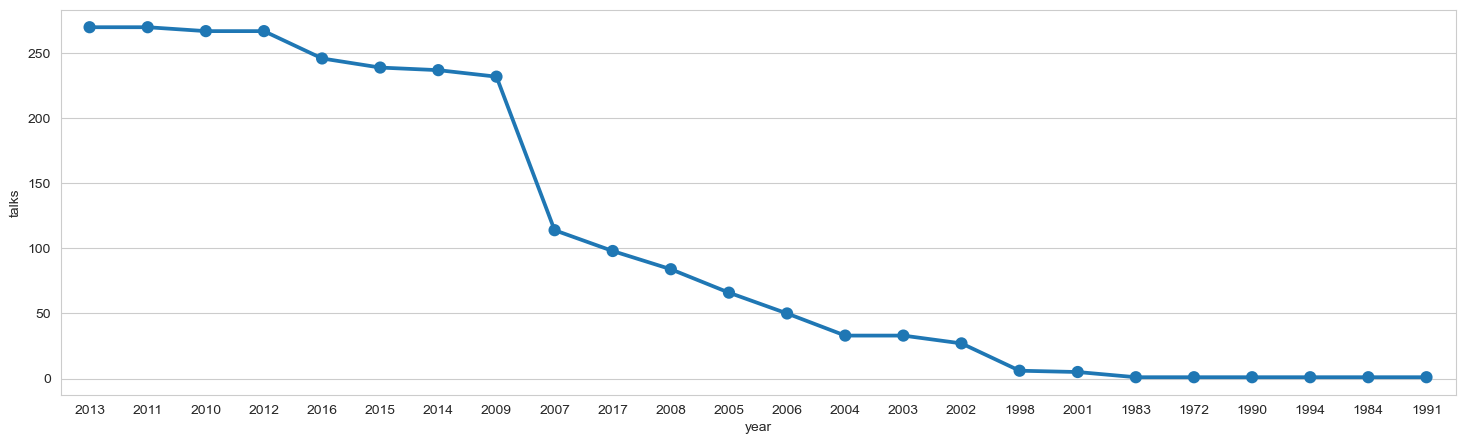

In [52]:
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

- As expected, the number of TED Talks have gradually increased over the years since its inception in 1984.
- There was a sharp increase in the number if talks in 2009.
- The number of talks have been pretty much constant since 2009.